<a href="https://colab.research.google.com/github/ethvedbitdesjan/SummerResearch/blob/main/ComplexConvolutions_Consistent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [2]:
%cd content/MyDrive/SummerResearch

/content/content/MyDrive/SummerResearch


In [3]:
# Critical imports
import os
import numpy as np
import pandas as pd
from PIL import Image
import random
import cv2
import copy
import torch
import torchvision
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
import shutil

In [5]:
funny_set = set()
not_funny_set = set()
with open('labelled_data/funny_consistent.csv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        funny_set.add(line.strip())
with open('labelled_data/not_funny_consistent.csv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        not_funny_set.add(line.strip())
len(funny_set), len(not_funny_set)

(812, 1194)

In [6]:
train_data = []
train_funny_data = []
train_not_funny_data = []
count = 0

for file in os.listdir('Funny_Originals_Final'):
  #img_array = Image.open(os.path.join('Funny_Originals_Final', file))
  if file in funny_set:
    train_funny_data.append(file)
  if file in not_funny_set:
    train_not_funny_data.append(file)
  count += 1
for file in os.listdir('Non-Funny_Modified_Final'):
  #img_array = Image.open(os.path.join('Non-Funny_Modified_Final', file))
  if file in funny_set:
    train_funny_data.append(file)
  if file in not_funny_set:
    train_not_funny_data.append(file)
train_data = train_funny_data + train_not_funny_data
len(train_data)

2006

In [23]:
random.seed(2354465)
random.shuffle(train_data)
idx_train_split = int(0.6 * len(train_data))
idx_test_split = int(0.8*len(train_data))
train_dataset = train_data[:idx_train_split]
valid_dataset = train_data[idx_train_split:idx_test_split]
test_dataset = train_data[idx_test_split:]
folders = []
os.mkdir('Dataset_Consistent')
for file in ['train', 'valid', 'test']:
  folders.append('Dataset_Consistent/' + file)
  os.mkdir(folders[-1])
  os.mkdir(folders[-1]+'/'+'Funny_Consistent')
  os.mkdir(folders[-1]+'/'+'Not_Funny_Consistent')

for file in train_dataset:
  if file in funny_set:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/train/Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/train/Funny_Consistent/' + file)
  else:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/train/Not_Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/train/Not_Funny_Consistent/' + file)
for file in valid_dataset:
  print(file)
  if file in funny_set:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/valid/Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/valid/Funny_Consistent/' + file)
  else:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/valid/Not_Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/valid/Not_Funny_Consistent/' + file)
for file in test_dataset:
  print(file)
  if file in funny_set:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/test/Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/test/Funny_Consistent/' + file)
  else:
    if 'O' in file:
      shutil.copy('Funny_Originals_Final/'+file, 'Dataset_Consistent/test/Not_Funny_Consistent/' + file)
    else:
      shutil.copy('Non-Funny_Modified_Final/'+file, 'Dataset_Consistent/test/Not_Funny_Consistent/' + file)

O1594.jpg
M657.jpg
O827.jpg
O787.jpg
M896.jpg
M319.jpg
O23.jpg
M963.jpg
O736.jpg
O784.jpg
M923.jpg
O1030.jpg
O189.jpg
M935.jpg
O1084.jpg
M727.jpg
O614.jpg
M955.jpg
O110.jpg
O1282.jpg
M69.jpg
O1085.jpg
O1346.jpg
M333.jpg
O733.jpg
O1413.jpg
O925.jpg
O79.jpg
O1585.jpg
M957.jpg
O911.jpg
M810.jpg
O1330.jpg
O1111.jpg
O21.jpg
O1110.jpg
O53.jpg
O454.jpg
O895.jpg
O1694.jpg
O917.jpg
M416.jpg
O558.jpg
O4.jpg
M125.jpg
M147.jpg
M529.jpg
O1693.jpg
O32.jpg
M574.jpg
O1236.jpg
O801.jpg
M461.jpg
O929.jpg
O1090.jpg
O1174.jpg
O909.jpg
M647.jpg
O1367.jpg
O755.jpg
M630.jpg
O180.jpg
O44.jpg
O550.jpg
O1537.jpg
O913.jpg
O1573.jpg
M364.jpg
M885.jpg
O389.jpg
O1418.jpg
O1245.jpg
O561.jpg
O146.jpg
M126.jpg
O757.jpg
O768.jpg
M514.jpg
O1690.jpg
O943.jpg
O393.jpg
M537.jpg
M961.jpg
O808.jpg
O1006.jpg
M339.jpg
O1305.jpg
O516.jpg
O1097.jpg
O307.jpg
O467.jpg
M197.jpg
O457.jpg
M383.jpg
O680.jpg
O309.jpg
M475.jpg
M487.jpg
O655.jpg
O961.jpg
O125.jpg
M947.jpg
M708.jpg
O703.jpg
O1684.jpg
O701.jpg
M538.jpg
M173.jpg
O726.jpg
M4

In [25]:
num = np.sum([1 for file in train_dataset if file in funny_set ])
len(train_dataset), num, len(os.listdir('Dataset_Consistent/train/Not_Funny_Consistent/'))

(1203, 478, 725)

In [26]:
!pip install datasets

In [27]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="Dataset_Consistent/")
dataset

Resolving data files:   0%|          | 0/1203 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/401 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/402 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-ae5629d9e3ba1eda/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1203
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 401
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 402
    })
})

In [28]:
len(train_dataset), len(valid_dataset), len(test_dataset)

(1203, 401, 402)

In [31]:
train_data1 = []
for file in train_data:
  if 'O' in file:
    img_array = Image.open(os.path.join('Funny_Originals_Final', file))
  else:
    img_array = Image.open(os.path.join('Non-Funny_Modified_Final', file))
  if file in funny_set:
    train_data1.append((img_array, 1))
  else:
    train_data1.append((img_array, 0))
len(train_data1)

2006

In [36]:
train_data1[:10]

[(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=586x413 at 0x7FD7C9AD8A90>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1250x783 at 0x7FD7C9E4AD70>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7FD7C9E4A620>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=563x517 at 0x7FD7C9E4AA70>,
  1),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x425 at 0x7FD7C9E49A80>,
  1),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=920x686 at 0x7FD7C9E482E0>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FD7C9E4B4F0>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x409 at 0x7FD7C9E4AF20>,
  1),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x471 at 0x7FD7C9E4A8F0>,
  0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x408 at 0x7FD7C9E4A740>,
  1)]

In [ ]:
train_data = []
train_funny_data = []
train_not_funny_data = []
count = 0
added = set()
for file in os.listdir('Funny_Originals_Final'):
  img_array = Image.open(os.path.join('Funny_Originals_Final', file))
  if file in funny_set:
    added.add(file)
    train_funny_data.append((img_array, 1))
  if file in not_funny_set:
    added.add(file)
    train_not_funny_data.append((img_array, 0))
  count += 1
for file in os.listdir('Non-Funny_Modified_Final'):
  img_array = Image.open(os.path.join('Non-Funny_Modified_Final', file))
  if file in funny_set:
    added.add(file)
    train_funny_data.append((img_array, 1))
  if file in not_funny_set:
    added.add(file)
    train_not_funny_data.append((img_array, 0))
random.seed(2354465)

In [ ]:
print(len(train_funny_data), len(train_not_funny_data))
train_not_funny_data1 = random.sample(train_not_funny_data, k = len(train_funny_data)+10)
train_data = train_funny_data + train_not_funny_data1
len(train_data), len(train_funny_data), len(train_not_funny_data), len(train_not_funny_data1)
train_data = train_funny_data + train_not_funny_data

1133 1560


In [ ]:
random.shuffle(train_data)

In [37]:
class FunnyNotFunnyDataset(Dataset):
    def __init__(self, data, root_dir=None, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        image = self.data[index][0]
        if self.transform:
          image = self.transform(image)
        label = self.data[index][1]
        label_tensor = torch.zeros(1)
        if label == 1:
          label_tensor[0] = 1
        return {'image_data':image, 'label':label_tensor}

In [38]:
class ResNetAdded(torch.nn.Module):
    def __init__(self, resnet50=None, train_full=True):
        super(ResNetAdded, self).__init__()
        if resnet50:
            self.resnet50 = resnet50
        else:
            self.resnet50 = models.resnet50(pretrained=True)
        if not train_full:
            for param in self.resnet50.parameters():
                param.requires_grad = False
        self.resnet50.fc = torch.nn.Linear(2048, 1)
        self.feature_extractor = None

    def forward(self, x):
        """
        x: A batch of images.

        Returns: A tensor of predictions.
        """

        # x = self.resnet50(x)
        # preds = self.classifier(x)
        preds = self.resnet50(x)
        return preds

    def feature_extraction(self, x):
        if self.feature_extractor is None:
            self.feature_extractor = torch.nn.Sequential(*(list(self.resnet50.children())[:-1]))
        features = self.feature_extractor(x)
        return features

class AlexNetAdded(torch.nn.Module):
    def __init__(self, alexnet=None, train_full=True):
        super(AlexNetAdded, self).__init__()
        if alexnet:
            self.alexnet = alexnet
        else:
            self.alexnet = models.alexnet(pretrained=True)
        if not train_full:
            for param in self.alexnet.parameters():
                param.requires_grad = False
        self.alexnet.classifier[6] = torch.nn.Linear(4096, 1)
        self.feature_extractor = None
    def forward(self, x):
        """
        x: A batch of images.

        Returns: A tensor of predictions.
        """
        preds = self.alexnet(x)
        return preds

class InceptionAdded(torch.nn.Module):
    def __init__(self, inception=None, train_full=True):
        super(InceptionAdded, self).__init__()
        if inception:
            self.xception = inception
        else:
            self.inception = models.inception_v3(pretrained=True)
        if not train_full:
            for param in self.inception.parameters():
                param.requires_grad = False
        self.inception.fc = torch.nn.Linear(2048, 1)
        self.feature_extractor = None
    def forward(self, x):
        """
        x: A batch of images.

        Returns: A tensor of predictions.
        """
        preds = self.inception(x)
        return preds

class DenseNetAdded(torch.nn.Module):
    def __init__(self, densenet=None, train_full=True):
        super(DenseNetAdded, self).__init__()
        if densenet:
            self.densenet = densenet
        else:
            self.densenet = models.densenet201(pretrained=True)
        if not train_full:
            for param in self.densenet.parameters():
                param.requires_grad = False
        self.densenet.classifier = torch.nn.Linear(1920, 1)
        self.feature_extractor = None
    def forward(self, x):
        """
        x: A batch of images.

        Returns: A tensor of predictions.
        """
        preds = self.densenet(x)
        return preds

In [39]:
model = ResNetAdded(train_full=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 308MB/s]


In [40]:
idx_train_split = int(0.6 * len(train_data1))
idx_test_split = int(0.8*len(train_data1))
IMAGE_SIZE = 224
NUM_CLASSES = 2
BATCH_SIZE = 16
device = 'cuda' if torch.cuda.is_available() else 'cpu'
IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD = [0.229, 0.224, 0.225]
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.RandomPerspective(),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD)
])
test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD)
])
train_dataset = FunnyNotFunnyDataset(train_data1[:idx_train_split], transform = train_transform)
valid_dataset = FunnyNotFunnyDataset(train_data1[idx_train_split:idx_test_split], transform = test_transform)
test_dataset = FunnyNotFunnyDataset(train_data1[idx_test_split:] ,transform = test_transform)
train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=True)
model.to(device)

ResNetAdded(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     

In [41]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.001)

In [42]:
import gc
gc.collect()

91

In [43]:
import matplotlib.pyplot as plt

In [44]:
def train(num_epochs, save_name):
  best_valid_loss = 10000
  best_valid_epoch = -1
  all_train_losses = []
  all_valid_losses = []
  count = 0
  for epoch in range(num_epochs):
    print('epoch:', epoch)
    model.train()
    running_loss = 0.0
    total_loss = []
    lrs = []
    total_size = 0
    correct = 0
    for i, data in enumerate(train_dataloader):
      inputs = data['image_data'].to(device)
      label = data['label'].to(device)
      inputs = inputs.type(torch.cuda.FloatTensor)
      label = label.type(torch.cuda.FloatTensor)
      output = model.forward(inputs)
      gc.collect()
      del inputs
      loss = criterion(output, label)
      loss.mean().backward()
      optimizer.step()
      optimizer.zero_grad()
      total_loss.append(loss.item())
      gc.collect()
      del loss
      torch.cuda.empty_cache()
      output = torch.sigmoid(output)
      predictions = torch.as_tensor((output - 0.5) > 0, dtype=torch.int32)
      correct += (predictions == label).float().sum().item()
      gc.collect()
      #gpu_usage()
      del predictions
      del label
      del output
      #gpu_usage()
      torch.cuda.empty_cache()
      #print(predictions, "\n", targets, "\n", correct)
      total_size += BATCH_SIZE
      accuracy = correct/(total_size)
      #print(correct, total_size)
      lrs.append(optimizer.param_groups[0]['lr'])
    print('Mean Train loss:', np.mean(total_loss), 'Train Accuracy:', accuracy)
    all_train_losses.append(np.mean(total_loss))
    model.eval()
    total_size = 0
    total_loss = []
    correct = 0
    with torch.no_grad():
        for data in valid_dataloader:
            gc.collect()
            torch.cuda.empty_cache()
            inputs = data["image_data"].to(device)
            targets = data["label"].to(device)

            inputs = inputs.type(torch.cuda.FloatTensor)
            targets = targets.type(torch.cuda.FloatTensor)
            #print(ids.shape, "ids")
            batch_size = inputs.size(0)

            output = model.forward(inputs)
            gc.collect()
            del inputs
            loss = criterion(output, targets)
            total_loss.append(loss.item())
            gc.collect()
            del loss
            torch.cuda.empty_cache()
            output = torch.sigmoid(output)

            predictions = torch.as_tensor((output - 0.5) > 0, dtype=torch.int32)
            if (predictions == targets).float().sum().item() > batch_size:
              print('error?')
            correct += (predictions == targets).float().sum().item()
            gc.collect()
            del predictions
            del targets
            del output
            torch.cuda.empty_cache()
            total_size += batch_size
            #gpu_usage()
        accuracy = correct/(total_size)
    all_valid_losses.append(np.mean(total_loss))
    if np.sum(total_loss) < best_valid_loss:
      best_valid_loss = np.sum(total_loss)
      best_model_weights = copy.deepcopy(model.state_dict())
      best_valid_epoch = epoch
      path = save_name
      torch.save(model.state_dict(), path)
      print(f"Model Saved")
    if len(all_valid_losses) > 1:
      if np.abs(all_valid_losses[-1] - all_valid_losses[-2]) > 0.01:
        count = 0
      else:
        count += 1
    print("Validation Loss over a batch: {:.4f}; Validation Accuracy: {:.2f}%".format(np.mean(total_loss), accuracy*100))
    if count > 2:
      break
  epochs = [i+1 for i in range(len(all_train_losses))]
  plt.plot(epochs, all_train_losses, marker='o')
  plt.plot(epochs, all_valid_losses, marker='o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
def test():
  model.eval()
  total_size = 0
  total_loss = []
  correct = 0
  all_preds = []
  all_targets = []
  with torch.no_grad():
      for data in test_dataloader:
          gc.collect()
          torch.cuda.empty_cache()
          inputs = data["image_data"].to(device)
          targets = data["label"].to(device)

          inputs = inputs.type(torch.cuda.FloatTensor)
          targets = targets.type(torch.cuda.FloatTensor)
          #print(ids.shape, "ids")
          batch_size = inputs.size(0)

          output = model.forward(inputs)
          gc.collect()
          del inputs
          loss = criterion(output, targets)
          total_loss.append(loss.item())
          gc.collect()
          del loss
          torch.cuda.empty_cache()
          output = torch.sigmoid(output)

          predictions = torch.as_tensor((output - 0.5) > 0, dtype=torch.int32)
          if (predictions == targets).float().sum().item() > batch_size:
            print('error?')
          all_preds += predictions.flatten().cpu().detach().tolist()
          all_targets += targets.flatten().cpu().detach().tolist()
          correct += (predictions == targets).float().sum().item()
          gc.collect()
          del predictions
          del targets
          del output
          torch.cuda.empty_cache()
          total_size += batch_size
          #gpu_usage()
      accuracy = correct/(total_size)
  print("Total Test Loss: {:.4f}; Test Accuracy: {:.2f}%".format(np.sum(total_loss), accuracy*100))
  print(pd.DataFrame(confusion_matrix(all_preds, all_targets), columns=['Test Not Funny', 'Test Funny'], index=['Pred Not Funny', 'Pred Funny']))

epoch: 0
Mean Train loss: 0.6655445236124491 Train Accuracy: 0.5855263157894737
Model Saved
Validation Loss over a batch: 0.6156; Validation Accuracy: 70.57%
epoch: 1
Mean Train loss: 0.6189602370324888 Train Accuracy: 0.6570723684210527
Model Saved
Validation Loss over a batch: 0.5870; Validation Accuracy: 68.33%
epoch: 2
Mean Train loss: 0.6209468178843197 Train Accuracy: 0.6529605263157895
Model Saved
Validation Loss over a batch: 0.5558; Validation Accuracy: 71.82%
epoch: 3
Mean Train loss: 0.6009259059240943 Train Accuracy: 0.6694078947368421
Validation Loss over a batch: 0.5627; Validation Accuracy: 72.07%
epoch: 4
Mean Train loss: 0.5847159008446493 Train Accuracy: 0.6620065789473685
Validation Loss over a batch: 0.5982; Validation Accuracy: 64.84%
epoch: 5
Mean Train loss: 0.602073467483646 Train Accuracy: 0.6702302631578947
Model Saved
Validation Loss over a batch: 0.5437; Validation Accuracy: 71.07%
epoch: 6
Mean Train loss: 0.6037357861274167 Train Accuracy: 0.66529605263157

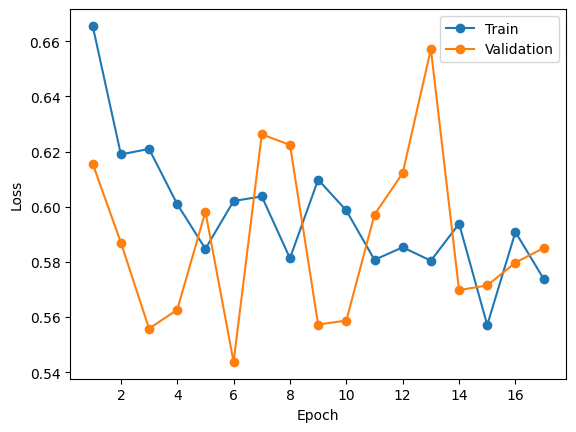

In [47]:
  train(num_epochs=20, save_name="best_model_resnet_last_layer_consistent.bin")

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.load_state_dict(torch.load('best_model_resnet_last_layer_consistent.bin'))
model.to(device)

ResNetAdded(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     

In [49]:
test()

Total Test Loss: 16.1946; Test Accuracy: 67.16%
                Test Not Funny  Test Funny
Pred Not Funny             171          71
Pred Funny                  61          99


In [ ]:
for param in model.alexnet.parameters():
  print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
